# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def roll(times):
    dice = [1, 2, 3, 4, 5, 6]
    return np.random.choice(dice, times, replace=True)

roll_10 = pd.DataFrame(roll(10))
roll_10.columns = ['val']
roll_10

,val
0,6
1,1
2,2
3,2
4,4
5,4
6,6
7,2
8,5
9,6


In [3]:
# Computing roll function on 9 rolls for further test on functions:
roll_9 = pd.DataFrame(roll(9))
roll_9.columns = ['val']

#### 2.- Plot the results sorted by value.

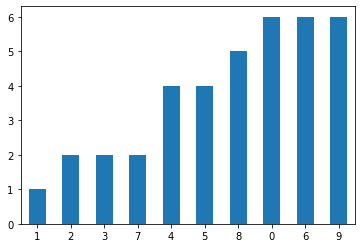

In [4]:
roll_10.sort_values(by='val', inplace=True)
roll_10.plot(kind='bar', rot=0, legend=False)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

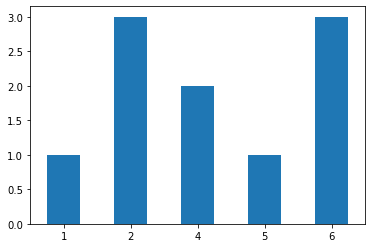

In [5]:
freq = roll_10.groupby('val')['val'].count()
freq.plot(kind='bar', rot=0, xlabel='')
plt.show()

*The first plot reads the indices associated with each outcome and the second plot reads the frequency of each outcome.
Both plot the frequency distribution of rolling dices.*

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
from itertools import chain

def mean1(rolls):
    return rolls['val'].sum() / len(rolls['val'])

In [7]:
mean1(roll_10)

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def mean2(rolls):
    freq = rolls['val'].value_counts()
    return sum(freq.index * freq.values)/sum(freq.values)

In [9]:
mean2(roll_10)

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [209]:
def median1(rolls):
    rolls = rolls.sort_values(by='val').reset_index(drop=True)
    if len(rolls)%2 != 0:
        return rolls.iloc[len(rolls) //2]
    if len(rolls)%2 == 0:
        return (rolls.iloc[len(rolls) //2 - 1] + rolls.iloc[len(rolls)//2]) /2

In [210]:
print(roll_10.sort_values(by='val'))
median1(roll_10)

   val
1    1
2    2
3    2
7    2
4    4
5    4
8    5
0    6
6    6
9    6


val    4.0
dtype: float64

In [212]:
print(roll_9.sort_values(by='val'))
median1(roll_9)

   val
4    1
8    1
5    2
7    3
6    5
0    6
1    6
2    6
3    6


val    5
Name: 4, dtype: int32

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [182]:
''' Needs improvement
def quartiles(rolls):
    rolls = rolls['val'].sort_values().reset_index(drop=True)
    if len(rolls)%2 != 0:
        Q1 = rolls.iloc[len(rolls) //4]
        Q2 = rolls.iloc[len(rolls) //2]
        Q3 = rolls.iloc[len(rolls) *3//4]
        Q4 = rolls.iloc[-1]
    if len(rolls)%2 == 0:
        Q2 = (rolls.iloc[len(rolls) //2 - 1] + rolls.iloc[len(rolls) //2]) /2
        Q4 = (rolls.iloc[-1])
        Q1 = (rolls.iloc[0] + Q2) /2
        Q3 = (Q2 + Q4)/2   
    return Q1, Q2, Q3, Q4
'''

In [229]:
def quartiles2(rolls):
    rolls = rolls.sort_values(by='val').reset_index(drop=True)
    Q2 = median1(rolls)
    Q4 = rolls.iloc[-1]
    split = len(rolls) //2
   
    if len(rolls)%2 != 0:
        lower_half = rolls.iloc[0:split+1]
        upper_half = rolls.iloc[split:]
    else: 
        lower_half = rolls.iloc[0:split-1]
        upper_half = rolls.iloc[split-1:]
        
    Q1 = median1(lower_half)
    Q3 = median1(upper_half)
    
    return Q1, Q2, Q3, Q4

In [159]:
quartiles(roll_10)

(2.5, 4.0, 5.0, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [16]:
hundred = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_4_Descriptive_Statistics\roll_the_dice_hundred.csv")
hundred.drop(columns=['Unnamed: 0', 'roll'], inplace=True)
hundred.rename(columns={'value': 'val'}, inplace=True)
hundred

,val
0,1
1,2
2,6
3,1
4,6
...,...
95,4
96,6
97,1
98,3


([], [])

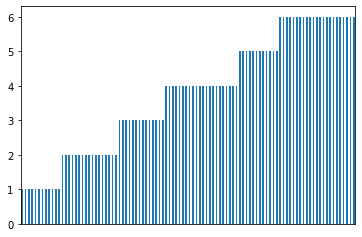

In [17]:
hundred['val'].sort_values().plot.bar()
plt.xticks([])

*Over 100 rolls, the outcomes are pretty evenly distributed across the 6 values.*

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
mean1(hundred)

3.74

#### 3.- Now, calculate the frequency distribution.


In [19]:
hun_vc = hundred['val'].value_counts()
hun_vc

6    23
4    22
2    17
3    14
1    12
5    12
Name: val, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

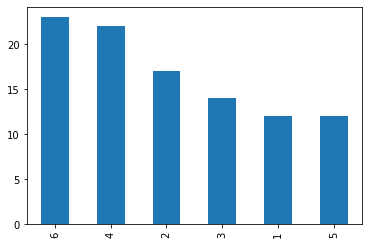

In [20]:
hun_vc.plot.bar()

*The histogram makes sense of the calculated mean value.* 

### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [21]:
thousand = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_4_Descriptive_Statistics\roll_the_dice_thousand.csv")
thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [22]:
thousand.drop(columns = ['Unnamed: 0', 'roll'], inplace=True)
thousand.rename(columns = {'value': 'val'}, inplace=True)
thousand

,val
0,5
1,6
2,1
3,6
4,5
...,...
995,1
996,4
997,4
998,3


<AxesSubplot:>

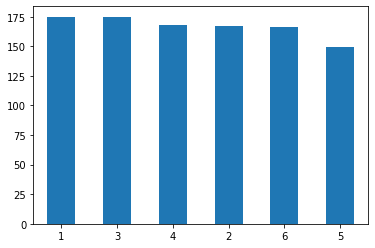

In [43]:
thousand['val'].value_counts().plot.bar(rot=0)

*The bigger the size of the sample, the more even the distribution: here my outcomes are almost equally probable.*

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

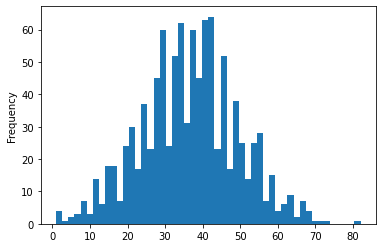

In [122]:
ages = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_4_Descriptive_Statistics\ages_population.csv")
freq = ages['observation'].value_counts()

ages['observation'].plot.hist(bins=50)
plt.show()

*It looks like we have a normal distribution, with mean somewhere around 40 and standard deviation around 39/3=13
(99.7% of dataset falls within 3 stdev of the mean).*

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [56]:
print('Mean of dataset: %.2f' % ages.mean())
print('Standard deviation of dataset: %.2f' % ages.std())

Mean of dataset: 36.56
Standard deviation of dataset: 12.82


*Close.*

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

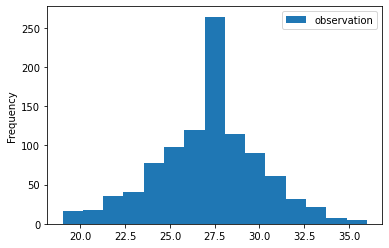

In [113]:
ages2 = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_4_Descriptive_Statistics\ages_population2.csv")
ages2.plot.hist(bins=15)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

*The distribution of ages in this dataset doesn't look normal: there is a peak around 27.5 and even distribution around this mean, with flatter tails on both sides. The range of ages is also much smaller, which predicts a much smaller standard deviation, around 7.5/3 = 2.5.*

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [54]:
print('Mean of dataset: %.2f' % ages2.mean())
print('Standard deviation of dataset: %.2f' % ages2.std())

Mean of dataset: 27.16
Standard deviation of dataset: 2.97


*Mean and STD are both lower, although the frequency distribution is very different.*

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

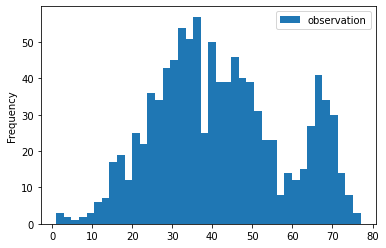

In [118]:
ages3 = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module2\Lab_4_Descriptive_Statistics\ages_population3.csv")
ages3.plot.hist(bins=40)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [55]:
print('Mean of dataset: %.2f' % ages3.mean())
print('Standard deviation of dataset: %.2f' % ages3.std())

Mean of dataset: 41.99
Standard deviation of dataset: 16.14


*The age distribution is bimodal: one cluster has a mean around 35, the other one has a mean around 68. This results in a mean of whole dataset between both values and standard deviation much higher than in the other 2 datasets.*

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [126]:
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


*In a symmetric distribution, we would have a Q3 of 50 for a range of 1 to 80: in dataset ages3, the range is smaller yet Q3 is higher, meaning there is some data points density in the last quartile.*

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [239]:
ages3.quantile(0.75)

observation    53.0
Name: 0.75, dtype: float64

In [236]:
ages3.quantile(0.80)

observation    57.0
Name: 0.8, dtype: float64

In [237]:
ages3.quantile(0.85)

observation    64.0
Name: 0.85, dtype: float64

In [235]:
ages3.quantile(0.90)

observation    67.0
Name: 0.9, dtype: float64

In [238]:
ages3.quantile(0.95)

observation    70.0
Name: 0.95, dtype: float64

*The age increases much faster between 80th and 85th percentile: this is where the 2 modes of our age distribution split.*

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [245]:
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [246]:
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [247]:
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


*The 3 neighborhoods illustrate how a dataset of the same size and having their mean and median similar can provide various types of distribution. Standard deviation is one indicator of the variability of distribution, quartiles provide additional information on the shape of distribution but plotting it to histograms is much easier to read.*